In [3]:
import pandas as pd
pd.__version__

'0.23.4'

# Pandas series Objects
* Series 1D object of pandas
* Frame 2D objects of pandas
* Panels > 2D

In [11]:
data = pd.Series([2,3,4,5,6])
print(data)
data.values

0    2
1    3
2    4
3    5
4    6
dtype: int64


array([2, 3, 4, 5, 6], dtype=int64)

In [12]:
data.index

RangeIndex(start=0, stop=5, step=1)

In [13]:
data[2]

4

* Supports custom indexing

In [17]:
data = pd.Series([2,4,5,6,7], index = ['a', 'b', 'c', 'd', 'e'])
print(data.index)
data['e']

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


7

In [23]:
age = {'Tim': 18, 'Charlie': 45, "Cook": 56, "Bill": 67}
hetro = {'1': 'Charlie', '2': 'Willy', '3': ['lyam', 'anne']}
het = pd.Series(hetro)
data = pd.Series(age)
data

Tim        18
Charlie    45
Cook       56
Bill       67
dtype: int64

In [20]:
data['Tim': 'Cook'] # Slicing with end point inclusive

Tim        18
Charlie    45
Cook       56
dtype: int64

In [26]:
print(pd.Series(5, index = [1,2,3,4,5]))
data = pd.Series(3, index = [1,2,2,3,4]) # Allows Duplication of keys
data[2]

1    5
2    5
3    5
4    5
5    5
dtype: int64


2    3
2    3
dtype: int64

# Data Frame for 2D data

In [10]:
s1 = pd.Series([12, 34, 45 ,67])
s2 = pd.Series(['Liam', 'Billy', 'John', 'drake'])

In [15]:
df = pd.DataFrame({'name': s2, 'age': s1})
df

,name,age
0,Liam,12
1,Billy,34
2,John,45
3,drake,67


In [16]:
df.head() # Returns First 5 entries
df.tail() # Returns last 5 entries
df.head(3)

,name,age
0,Liam,12


In [54]:
print(df['age'][0])
df.info() # Shows meta data i.e., Data of data

12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
name    4 non-null object
age     4 non-null int64
dtypes: int64(1), object(1)
memory usage: 144.0+ bytes


In [58]:
dir(df)
#len(dir(df))

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__

In [62]:
df.columns

Index(['name', 'age'], dtype='object')

In [63]:
df.keys

<bound method NDFrame.keys of     name  age
0   Liam   12
1  Billy   34
2   John   45
3  drake   67>

In [64]:
df.values

array([['Liam', 12],
       ['Billy', 34],
       ['John', 45],
       ['drake', 67]], dtype=object)

# Queries in Pandas

In [14]:
df[df.age < 40]

AttributeError: 'DataFrame' object has no attribute 'age'

In [71]:
(df.age > 12) & (df.age < 40)

0    False
1     True
2    False
3    False
Name: age, dtype: bool

In [74]:
df[df.age < 40]['age'][1]

34

In [78]:
print(df)
def check(x):
    if x < 40:
        return x**2
    else:
        return x
print(df['age'].apply(check)) # Can be applied only on object
df['age'][1].apply(check) # Can't be applied on data

    name  age
0   Liam   12
1  Billy   34
2   John   45
3  drake   67
0     144
1    1156
2      45
3      67
Name: age, dtype: int64


AttributeError: 'numpy.int64' object has no attribute 'apply'

In [81]:
print(df.index)
df.columns

RangeIndex(start=0, stop=4, step=1)


Index(['name', 'age'], dtype='object')

In [85]:
x = pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 5}])
print(x)
x.dtypes

     a  b    c
0  1.0  2  NaN
1  NaN  3  5.0


a    float64
b      int64
c    float64
dtype: object

In [86]:
# Selecting NaN i.e., missing  values from a particlar column
# isna is different from isnull
x[pd.isna(x['c']) == True]

,a,b,c
0,1.0,2,NaN


In [87]:
x.fillna(0)

,a,b,c
0,1.0,2,0.0
1,0.0,3,5.0


# Reading CSV files using pandas

In [18]:
df = pd.read_csv('Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [38]:
df[df['peak-rpm'] > '5000']['peak-rpm']

3      5500
4      5500
5      5500
6      5500
7      5500
8      5500
9      5500
10     5800
11     5800
15     5400
16     5400
17     5400
18     5100
19     5400
20     5400
21     5500
22     5500
23     5500
24     5500
25     5500
26     5500
27     5500
31     6000
32     5500
33     6000
34     6000
35     6000
36     6000
37     5800
38     5800
       ... 
134    5250
135    5250
136    5500
137    5500
143    5200
147    5200
165    6600
166    6600
178    5200
179    5200
180    5200
181    5200
183    5250
185    5250
186    5250
188    5500
189    5500
190    5500
191    5500
193    5500
194    5400
195    5400
196    5400
197    5400
198    5100
199    5100
200    5400
201    5300
202    5500
204    5400
Name: peak-rpm, Length: 109, dtype: object

In [1]:
#df[pd.isna(['normalized-losses']) == True]

# Assignment 
* IMDB data Scraping

In [2]:
import requests as rq
import bs4
import pandas as pd

In [98]:
class scrap:
    def __init__(self):
        self.url = 'https://www.imdb.com/chart/top?sort=rk'
    def movieData(self):
        self.data = rq.get(self.url)
        self.soup = bs4.BeautifulSoup(self.data.text, 'html.parser')
        self.table = self.soup.findAll('td', {'class': 'titleColumn'})
        self.ratings = self.soup.findAll('td', {'class': 'ratingColumn imdbRating'})
        #print(self.table[0].text[: -8])
        self.movies_mustWatch, self.movies_shouldSee = [], []
        for d in range(200):
            if float(self.ratings[d].text.replace('\n', ' ')) >= 8.5:
                self.movies_mustWatch.append([self.table[d].text.replace('\n', " ")[16: ], self.ratings[d].text.replace('\n', ' ')])
            else:
                self.movies_shouldSee.append([self.table[d].text.replace('\n', " ")[16: ], self.ratings[d].text.replace('\n', ' ')])
        self.df = pd.DataFrame(self.movies_mustWatch, columns = ['Must Watch Movies', " Rating"])
        self.data = [i[0] for i in self.movies_shouldSee]
        self.df["Most Viewed Movies"] = self.data[: len(self.movies_mustWatch)]
        self.data = [i[1] for i in self.movies_shouldSee]
        self.df["Rating"] = self.data[: len(self.movies_mustWatch)]
        return self.df
obj = scrap()
obj.movieData()

,Must Watch Movies,Rating,Most Viewed Movies,Rating
0,The Shawshank Redemption (1994),9.2,Apocalypse Now (1979),8.4
1,The Godfather (1972),9.2,Memento (2000),8.4
2,The Godfather: Part II (1974),9.0,Alien (1979),8.4
3,The Dark Knight (2008),9.0,Hotaru no haka (1988),8.4
4,12 Angry Men (1957),8.9,Nuovo Cinema Paradiso (1988),8.4
5,Schindler's List (1993),8.9,The Great Dictator (1940),8.4
6,The Lord of the Rings: The Return of the King ...,8.9,Spider-Man: Into the Spider-Verse (2018),8.4
7,Pulp Fiction (1994),8.9,Sunset Blvd. (1950),8.4
8,"Il buono, il brutto, il cattivo (1966)",8.8,The Lives of Others (2006),8.4
9,Fight Club (1999),8.8,Dr. Strangelove or: How I Learned to Stop Wor...,8.4


### Cropping Image in a circular way

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

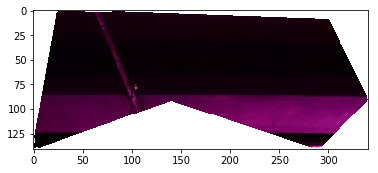

In [14]:
img = cv2.imread("C:\\New folder\\light.jpeg", cv2.IMREAD_COLOR)
pts = np.array([[10,150],[150,100],[300,150],[350,100],[310,20],[35,10]])

## (1) Crop the bounding rect
rect = cv2.boundingRect(pts)
x,y,w,h = rect
croped = img[y:y+h, x:x+w].copy()

## (2) make mask
pts = pts - pts.min(axis=0)

mask = np.zeros(croped.shape[:2], np.uint8)
cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)

## (3) do bit-op
dst = cv2.bitwise_and(croped, croped, mask=mask)

## (4) add the white background
bg = np.ones_like(croped, np.uint8)*255
cv2.bitwise_not(bg,bg, mask=mask)
dst2 = bg+ dst


#print(plt.imshow(croped))
#print(plt.imshow(mask))
#print(plt.imshow(dst))
plt.imshow(dst2)